In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from collections import Counter
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk
from scipy.stats import zscore
import jenkspy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import tree


In [7]:
house=pd.read_csv('housing.csv')
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
smartphone=pd.read_csv('smartphone.csv')
smartphone

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy SB,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy SS,Android,16,2,145.0,Samsung,5.1
6,iphone 5s,ios,32,1,112.0,Apple,4.0
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [9]:
thyroid=pd.read_csv('thyroid.csv')
thyroid

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107.0,10.1,2.2,0.9,2.7,1.0
1,NaN,9.9,3.1,2.0,5.9,1.0
2,127.0,12.9,2.4,NaN,0.6,1.0
3,109.0,NaN,1.6,1.4,1.5,1.0
4,105.0,7.3,1.5,NaN,-0.1,1.0
...,...,...,...,...,...,...
180,88.0,16.5,4.9,0.8,0.1,2.0
181,97.0,15.1,1.8,1.2,-0.2,2.0
182,106.0,13.4,3.0,1.1,0.0,NaN
183,79.0,19.0,5.5,NaN,0.3,2.0


# Q3:

In [29]:
smartphone

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy SB,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy SS,Android,16,2,145.0,Samsung,5.1
6,iphone 5s,ios,32,1,112.0,Apple,4.0
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [30]:
data_crosstab_01 = pd.crosstab(smartphone['Capacity'], 
                            smartphone['Company'],
                                margins = False)

data_crosstab_01

Company,Apple,Google,HTC,Microsoft,Motorola,Samsung,Sony
Capacity,,,,,,,
16,0,0,0,0,1,1,1
32,1,0,0,1,0,0,0
64,0,0,1,0,0,1,0
128,1,1,0,0,0,0,0


In [31]:
data_crosstab_02 = pd.crosstab(smartphone['Company'], 
                            [smartphone['Weight'],smartphone['inch']],
                                margins = False)
data_crosstab_02

Weight,112.0,138.0,143.0,144.5,145.0,149.0,150.0,170.0,180.0
inch,4.0,4.7,5.0,5.0,5.1,5.8,5.2,5.7,5.5
Company,,,,,,,,,
Apple,1,1,0,0,0,0,0,0,0
Google,0,0,1,0,0,0,0,0,0
HTC,0,0,0,0,0,0,0,1,0
Microsoft,0,0,0,0,0,0,1,0,0
Motorola,0,0,0,1,0,0,0,0,0
Samsung,0,0,0,0,1,1,0,0,0
Sony,0,0,0,0,0,0,0,0,1


In [32]:
data_crosstab_03 = pd.crosstab(smartphone['Company'], 
                            smartphone['OS'],
                                margins = False)

data_crosstab_03

OS,Android,ios,windows
Company,,,
Apple,0,2,0
Google,1,0,0
HTC,1,0,0
Microsoft,0,0,1
Motorola,1,0,0
Samsung,2,0,0
Sony,1,0,0


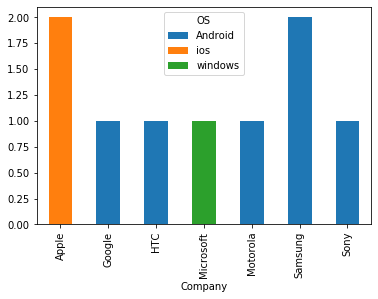

In [33]:
data_crosstab_03.plot(kind='bar',stacked=True)